# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

for i in range(len(cities)):
    cities[i] = cities[i].title()
    
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL\
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i , city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{cities[i]}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url).json() # Parse the JSON and retrieve data

        city_weather = response["weather"][0]["main"]
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat = response["coord"]["lat"]  
        city_lng = response["coord"]["lon"]         
        city_max_temp = (response["main"]["temp_max"] - 273) 
        city_humidity = response["main"]["humidity"]    
        city_clouds = response["clouds"]["all"]    
        city_wind = response["wind"]["speed"]       
        city_country = response["sys"]["country"]
        city_date = response["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date
                            })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Mys Shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | Ushuaia
Processing Record 3 of Set 1 | Lons
Processing Record 4 of Set 1 | Punta Arenas
Processing Record 5 of Set 1 | Klaksvik
Processing Record 6 of Set 1 | Paamiut
Processing Record 7 of Set 1 | Baneh
Processing Record 8 of Set 1 | Alta
Processing Record 9 of Set 1 | Rikitea
Processing Record 10 of Set 1 | Owerri
Processing Record 11 of Set 1 | Tabiauea
City not found. Skipping...
Processing Record 12 of Set 1 | Hamilton
Processing Record 13 of Set 1 | Richards Bay
Processing Record 14 of Set 1 | Labelle
Processing Record 15 of Set 1 | Taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | Kapaa
Processing Record 17 of Set 1 | Arraial Do Cabo
Processing Record 18 of Set 1 | Pyinmana
Processing Record 19 of Set 1 | Lazaro Cardenas
Processing Record 20 of Set 1 | Mataura
Processing Record 21 of Set 1 | Constitu

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,8.96,87,0,1.03,AR,1674280580
1,Lons,43.3167,-0.4000,-0.39,93,20,2.06,FR,1674280720
2,Punta Arenas,-53.1500,-70.9167,10.21,93,75,3.60,CL,1674280330
3,Klaksvik,62.2266,-6.5890,8.66,97,100,15.26,FO,1674280721
4,Paamiut,61.9940,-49.6678,-19.73,76,5,5.09,GL,1674280722


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ushuaia,-54.8000,-68.3000,8.96,87,0,1.03,AR,1674280580
1,Lons,43.3167,-0.4000,-0.39,93,20,2.06,FR,1674280720
2,Punta Arenas,-53.1500,-70.9167,10.21,93,75,3.60,CL,1674280330
3,Klaksvik,62.2266,-6.5890,8.66,97,100,15.26,FO,1674280721
4,Paamiut,61.9940,-49.6678,-19.73,76,5,5.09,GL,1674280722


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

Plot for Latitude vs Max Temp
--------------------------------------------------


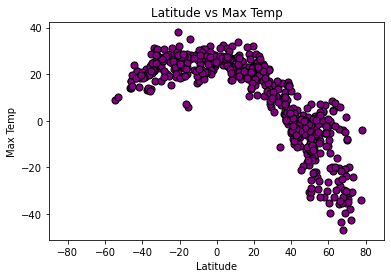

Plot for Latitude vs Humidity
--------------------------------------------------


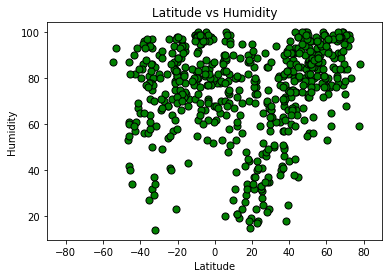

Plot for Latitude vs Cloudiness
--------------------------------------------------


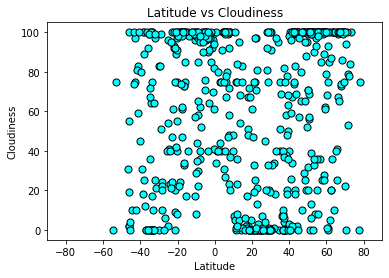

Plot for Latitude vs Wind Speed
--------------------------------------------------


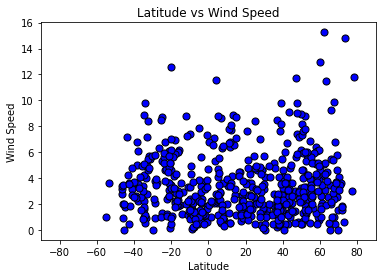

In [8]:
#Latitude vs. Temperature
x_values = city_data_df["Lat"]
chart_ylabels = ["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
chart_colours = ["purple", "green", "cyan", "blue"]

for index, y_variable in enumerate(chart_ylabels):
    y_values = city_data_df[y_variable]

    plt.scatter(
        x_values,
        y_values,
        color = chart_colours[index],
        marker = 'o',
        s = 50,
        edgecolors = 'black')
    plt.xlabel('Latitude')
    plt.ylabel(y_variable)
    plt.title(f"Latitude vs {y_variable}")
    plt.xlim(-90, 90)

    plt.savefig(f"output_data/Fig{index + 1}.png")
    print(f"Plot for Latitude vs {y_variable}")
    print('-' * 50)
    plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [9]:
# Define a function to create Linear Regression plots
def create_plot(df, y_variable):

    x_values = df["Lat"]
    
    #get plot axis range for annotation location.
    ymin = df[y_variable].min()
    xmin = df["Lat"].min()

    ymax = df[y_variable].max()
    xmax = df["Lat"].max()

    y_values = df[y_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(
        x_values,
        y_values,
        color = 'blue',
        marker = 'o',
        s = 50,
        edgecolors = 'black')

    plt.plot(x_values, regress_values, "r-", linewidth = 1)
    #plt.annotate(line_eq, (xmin + 1, ymin + 5), fontsize =10, color = "red")
    plt.xlabel('Latitude')
    plt.ylabel(y_variable)
    plt.suptitle(f"The r-value is: {rvalue}", fontsize = 8, x = 0.2, y = 0.95)
    plt.annotate(line_eq, xy=(0.8, 1.05), fontsize =8, color = "red",
             xycoords='axes fraction', textcoords='axes fraction')
    if xmin >= 0:
        plt.xlim(-5, xmax + 5)
    else:
        plt.xlim(xmin - 5, 5)
    plt.show()

In [10]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.query('Lat >= 0')

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Lons,43.3167,-0.4000,-0.39,93,20,2.06,FR,1674280720
3,Klaksvik,62.2266,-6.5890,8.66,97,100,15.26,FO,1674280721
4,Paamiut,61.9940,-49.6678,-19.73,76,5,5.09,GL,1674280722
5,Baneh,35.9975,45.8853,3.05,42,7,1.45,IR,1674280723
6,Alta,69.9689,23.2717,-8.26,73,22,1.54,NO,1674280723


In [11]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.query('Lat <= 0')

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ushuaia,-54.8000,-68.3000,8.96,87,0,1.03,AR,1674280580
2,Punta Arenas,-53.1500,-70.9167,10.21,93,75,3.60,CL,1674280330
7,Rikitea,-23.1203,-134.9692,26.37,71,47,4.66,PF,1674280581
10,Richards Bay,-28.7830,32.0377,27.28,66,99,3.77,ZA,1674280727
13,Arraial Do Cabo,-22.9661,-42.0278,22.21,91,100,4.74,BR,1674280617


###  Temperature vs. Latitude Linear Regression Plot

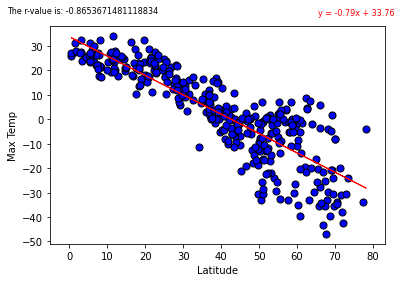

In [12]:
# Linear regression on Northern Hemisphere
y_variable = 'Max Temp'
create_plot(northern_hemi_df, y_variable)

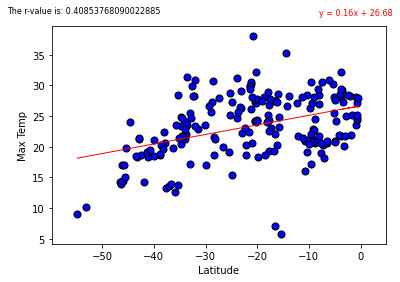

In [13]:
# Linear regression on Southern Hemisphere
y_variable = 'Max Temp'
create_plot(southern_hemi_df, y_variable)

**Discussion about the linear relationship:** The temperature of a given temperature appears to be correlated quite well in the Northern hemisphere with an r value of 0.87. As we approach the equator, in general, the temperature tends to increase.  The Southern hemisphere doesn't appear to be as well correlated, however this may be a due to a combination of less datapoints (with a few outliers), however in general, the trend tends to be similar to that of the northern hemisphere, where as we approach a latitude of 0, temperature is generally higher.

### Humidity vs. Latitude Linear Regression Plot

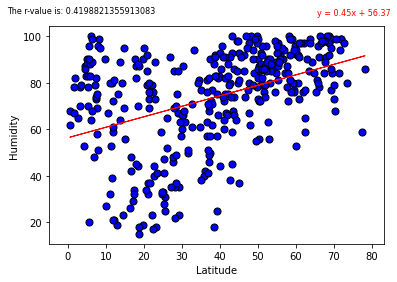

In [14]:
# Northern Hemisphere
y_variable = 'Humidity'
create_plot(northern_hemi_df, y_variable)

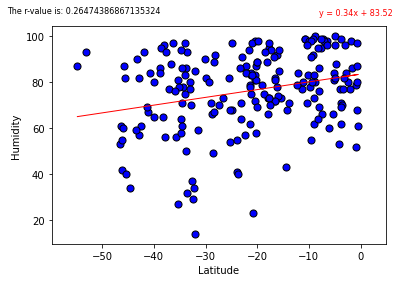

In [15]:
# Southern Hemisphere
y_variable = 'Humidity'
create_plot(southern_hemi_df, y_variable)

**Discussion about the linear relationship:** Humidity does not appear to be very well correlated in the southern hemisphere, but a general trend can still be observed with places with a lower latitude have greater variablility in humidity, whereas those along the equator tend to be generally quite high. As latitude increases above the equator from 10-40, variablility again becomes quite high, perhaps more determined by local weather. However once approaching the arctic, humidity tends to be >50, possibly a function of colder temperatures, meaning that the moisture holding capacity of the air is lower, which would naturally lead to higher relative humidity values (as less water is required to reach a high humidity value).

### Cloudiness vs. Latitude Linear Regression Plot

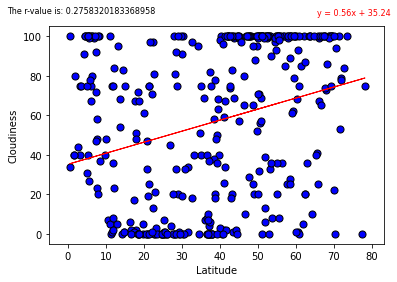

In [16]:
# Northern Hemisphere
y_variable = 'Cloudiness'
create_plot(northern_hemi_df, y_variable)

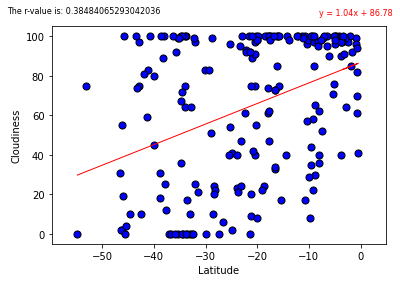

In [17]:
# Southern Hemisphere
y_variable = 'Cloudiness'
create_plot(southern_hemi_df, y_variable)

**Discussion about the linear relationship:** In terms of linear relationship, cloudiness does not appear to be very well corelated with latitude. It is worth noting two apparent trends howerver; there seems to be a bias for values of either 0 or 100, which would naturally lower the r-value, producing a poorer linear trend. Also there are very almost no 0 values at the equator, suggesting that it is quite rare to find places along the equator that do not possess any clouds (due to a more tropical climate).

### Wind Speed vs. Latitude Linear Regression Plot

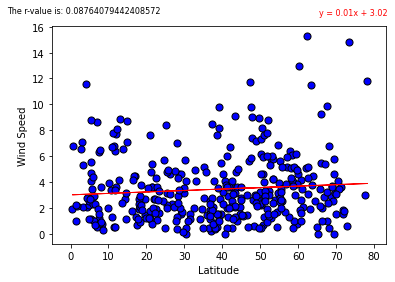

In [18]:
# Northern Hemisphere
y_variable = 'Wind Speed'
create_plot(northern_hemi_df, y_variable)

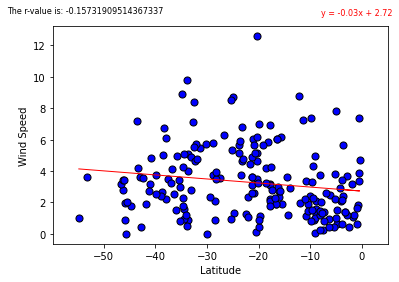

In [19]:
# Southern Hemisphere
y_variable = 'Wind Speed'
create_plot(southern_hemi_df, y_variable)

**Discussion about the linear relationship:** Wind speed does not appear to have any major relationship with latitude, having both a very low r-value, and almost horizontal gradient through both the northern and southern hemispheres. Wind speed is likely more of a function of local weather conditions and location of the town (near the coast, topography, etc.)